In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
list(data.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

<Axes: >

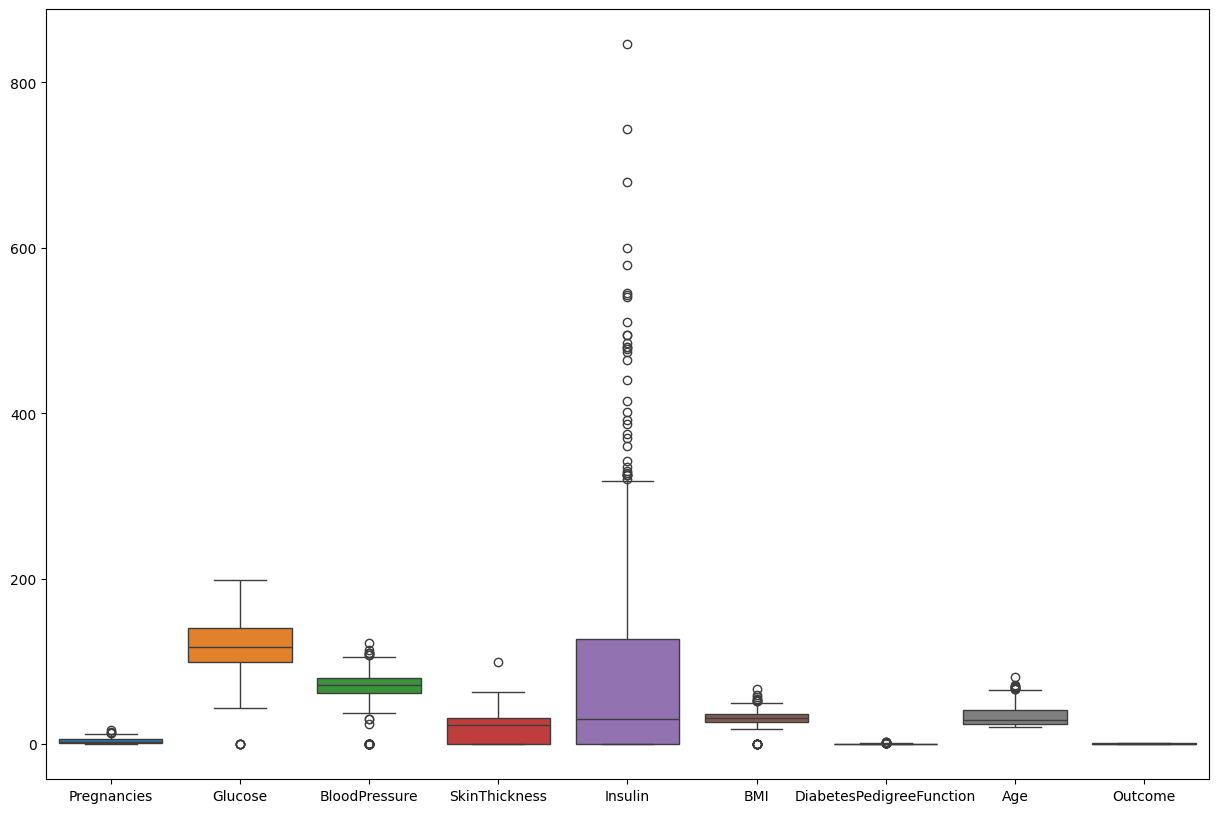

In [6]:
size = plt.figure(figsize=(15,10))
sns.boxplot(data=data)

In [7]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [8]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

for col in cols:
    q1 = x[col].quantile(0.25)
    q3 = x[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    mask = (x[col] >= lower_bound) & (x[col] <= upper_bound)


In [9]:
x_out = x[mask]
y_out = y[mask]

In [10]:
x_out.shape

(759, 8)

<Axes: >

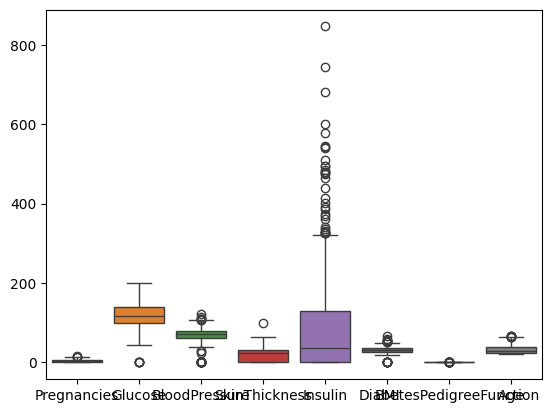

In [11]:
sns.boxplot(data=x_out)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = scaler.fit_transform(x_out)
scaler_x

array([[ 0.64327075,  0.85262711,  0.14998841, ...,  0.19561647,
         0.46879263,  1.54828125],
       [-0.83984741, -1.12276271, -0.16147863, ..., -0.70126851,
        -0.36177415, -0.16252742],
       [ 1.23651801,  1.9500659 , -0.26530097, ..., -1.12408571,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712,  0.00603147,  0.14998841, ..., -0.75251908,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.16280844, -0.47294567, ..., -0.25282602,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.87191956,  0.04616606, ..., -0.21438809,
        -0.47010895, -0.88286791]])

<Axes: >

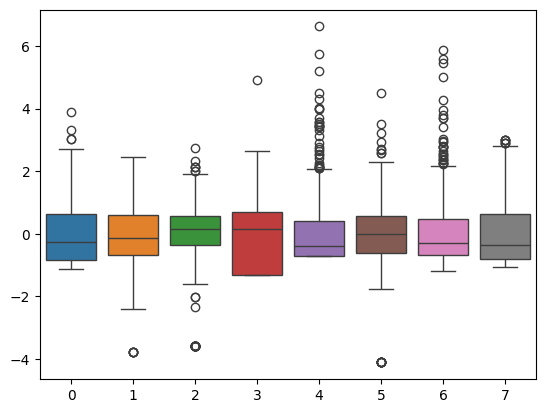

In [13]:
sns.boxplot(data=scaler_x)

In [15]:
x_scaled = pd.DataFrame(scaler_x)

In [16]:
x_scaled.reset_index(drop=True ,inplace=True)
y_out.reset_index(drop=True , inplace=True)

In [17]:

q = x_scaled[4].quantile(0.95)
mask = (x_scaled[4] < q) & (x_scaled[6] < q) & (x_scaled[5] < q)
datanew = x_scaled[mask]
target = y_out[mask]

<Axes: >

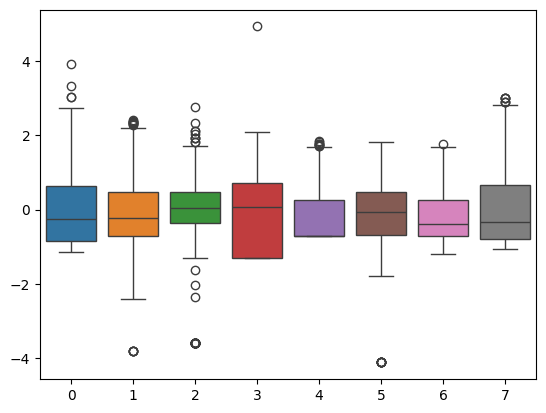

In [18]:
sns.boxplot(data=datanew)

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(datanew , target , test_size=0.3 , random_state=42)

In [20]:
x_train.shape

(463, 8)

In [22]:
x_test.shape

(199, 8)

In [21]:
y_train.value_counts()

Outcome
0    314
1    149
Name: count, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled , y_train_resampled = smote.fit_resample(datanew,target)

print(pd.Series(y_train_resampled).value_counts())

Outcome
1    455
0    455
Name: count, dtype: int64


In [25]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train_resampled,y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_prediction = logistic.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.7788944723618091

In [30]:
from sklearn.metrics import classification_report
target_namme = ['non-diabetic','diabetic']
print(classification_report(y_test,y_prediction,target_names=target_namme))

              precision    recall  f1-score   support

non-diabetic       0.89      0.79      0.83       141
    diabetic       0.59      0.76      0.67        58

    accuracy                           0.78       199
   macro avg       0.74      0.77      0.75       199
weighted avg       0.80      0.78      0.79       199



In [ ]:
import pickle
pickle.dump(classification_report , open('classification.pkl','wb'))


In [46]:
report = pickle.load(open('classification.pkl','rb'))
print(report)
# report.predict(x_test)

<function classification_report at 0x000001F25A667760>
